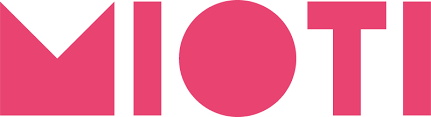
<center style="color:#888">Módulo Advanced Data Science<br/>Natural Language Processing</center>

# S1. Challenge. Clasificación multi-etiqueta (Parte 1)

En este **challenge** vamos a aprender a predecir etiquetas de *posts* de [StackOverflow](https://stackoverflow.com). Técnicamente, es una tarea de clasificación multi-etiqueta. Nótese que el lenguaje en el que están escritas las entradas es el **INGLÉS**, con lo que algunos de los pasos serás específicos para dicho idioma.

Debido a la longitud del proyecto, está dividido en dos partes. En esta primera parte nos enfocaremos en el preprocesado y construcción de features. Para terminar entrenando modelos en una segunda parte.

## Librerías

Haremos uso de las siguientes librerías
- [Numpy](http://www.numpy.org) 
- [Pandas](https://pandas.pydata.org) 
- [scikit-learn](http://scikit-learn.org/stable/index.html)
- [NLTK](http://www.nltk.org) — librería básica para trabajar con texto en Python

aunque si quieres pudes usar spaCy para algunas tareas.

##  Preprocesado

Una de las primeras técnicas que vamos a utilizar para preprocesar textos es la eliminación de las conocidas como **stop words**, es decir, palabras que no aportan mucho significado, pero que son necesarias para que el texto sea legible y siga las normas. Para ello, lo primero es conseguir una lista con las *stop words* del lenguaje requerido.

Una opción para conseguir esta lista de palabras, es usar la librería `nltk`.

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JPAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


En el *challenge* tenemos un dataset con títulos de entradas de StackOverflow, debidamente etiquetado (con 100 etiquetas distintas).

In [2]:
from __future__ import annotations
from ast import literal_eval
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [4]:
train = read_data('data/train.tsv')
train, validation = train_test_split(train, test_size = .15, random_state = 0)
test = read_data('data/test.tsv')

In [5]:
train.head()

,title,tags
96598,How to create an array of leaf nodes of an htm...,"[javascript, arrays, dom]"
10007,how to make maven use test resources,"[java, maven]"
15802,How do I get the path where the user installed...,[java]
9114,why are my buttons not showing up?,"[java, swing]"
34247,How to loop an array with strings as indexes i...,"[php, arrays, string, loops]"


Como vemos, la columna `"title"` contiene los títulos de las entradas, y la columna `"tags"` una lista con las etiquetas de cada entrada, que puede ser un número arbitrario.

Para seguir los convenios, inicializamos `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test`.

In [6]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test, y_test = test['title'].values, test['tags'].values

La principal dificultad de trabajar con lenguaje natural es que no está estructurado. Si cojemos el texto y creamos tokens simplemente separando por los espacios, tendremos *tokens* como `'3.5?'`, `'do.'`, etc. Para evitar esos problemas, es útil preprocesar el texto.

### **Tarea 1 (Preprocesado):**

Implementa la función `text_tokenizer()` y `text_prepare()` siguiendo las instrucciones.

In [7]:
import sys
!{sys.executable} -m spacy download en_core_web_sm 

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
from string import ascii_lowercase
import spacy
nlp = spacy.load('en_core_web_sm') # Se crea un objeto de spacy tipo nlp, en idioma ingles para poder tokenizar.
import re
def text_tokenizer(text :str) -> list[str]:
    """
    Transforma un texto (str) en una lista de palabras/tokens (list).
    Es importante usar esta función siempre para ser consistentes.
    """
    ## ESCRIBE AQUÍ TU CÓDIGO
#     tokenizer = nlp.tokenizer # Creamos exclusivamente un tokenizador con el opbjeto nlp de Spacy
#     tokens = [t.text for t in tokenizer(text)] # Crea una lista con las palabras del texto

    tokens = nltk.tokenize.word_tokenize(text)
    return tokens

    ##


# cargamos estas variables fuera de la función
# ya que la creación del set de stopwords es costoso y no queremos
# que se repita cada vez que se llame a la función
REPLACE_BY_SPACE = "[/(){}\[\]\|@,;]"
GOOD_CHARS = ascii_lowercase + "".join([str(n) for n in range(10)]) + " #+_"
STOPWORDS = set(stopwords.words("english"))


def text_prepare(text:str) -> str:
    """
    Preprocesa el texto inicial:
    1. eliminando espacios al inicio y final, y convirtiéndolo a minúsculas
    2. cambia los caracteres de REPLACE_BY_SPACE por espacios
    3. elimina los caracteres que no estén en GOOD_CHARS
    4. elimina los tokens que sean STOPWORDS

    text: str
    return: str
    """
    ## ESCRIBE AQUÍ TU CÓDIGO

    text = text.lower().strip()
    #Se reemplaza estos caracteres por espacios
    text = re.sub(REPLACE_BY_SPACE, " ", text)
#     text = text.replace(REPLACE_BY_SPACE,' ')
    # Se eliminan los caracteres que no son GOOD_CHARS
    good_chars = [word for word in text if word in GOOD_CHARS]
    # Se unen los caracteres en una cadena de texto mas filtrada de nuevo
    text = "".join(good_chars)
    #Se eliminan los tokens que no son stopwords
    tokens=text_tokenizer(text)
    tokens = [token for token in tokens if (token not in STOPWORDS)]
    # Se unen los tokens filtrados en una cadena de texto
    text = " ".join(tokens)
    return text
    ##

In [9]:
def test_text_prepare():
    examples = ["   SQL Server @ any equivalent of {Excel's} CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Respuesta incorrecta para: '%s'" % text_prepare(ex)
    return '¡Tests correctos!'

print(test_text_prepare())

¡Tests correctos!


Ahora preprocesamos los textos de todos los conjuntos:

In [10]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [11]:
X_train[:3]

['create array leaf nodes html dom using javascript',
 'make maven use test resources',
 'get path user installed java application']

### **Tarea 2 (Cuentas de palabras y etiquetas):** 

Cuénta cuantas veces aparece cada token (palabra) y cada etiqueta en el corpus de entrenamiento. Es decir, crea un diccionario con las cuentas totales de palabras y etiquetas.
 
El resultado deben ser dos diccionarios *tags_counts* y *words_counts* del tipo `{'palabra_o_etiqueta': cuentas}`.

In [12]:
######################################
##ESCRIBE AQUÍ TU CÓDIGO
######################################
# Diccionario con todas las etiquetas del corpus de entrenamiento con sus cuentas
tags_counts_temp = dict ()
for tags in y_train:
    for tag in tags:
        tags_counts_temp[tag]=tags_counts_temp.get(tag,0)+1
    
tags_counts = tags_counts_temp

# Diccionario con todas las palabras del corpus de entrenamiento con sus cuentas

words_counts_temp = dict ()
cont=0
for comment in X_train:
    tokens = text_tokenizer(comment)
    for word in tokens:
        cont+=1
        words_counts_temp[word]=words_counts_temp.get(word,0)+1

words_counts = words_counts_temp

# print(cont)
##


Exploramos las más comunes:

In [13]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print(most_common_tags)
print(most_common_words)

[('c#', 16259), ('javascript', 16219), ('java', 15835)]
[('using', 7000), ('c', 4911), ('php', 4774)]


* Como alternativa se puede utilizar la función FreqDist de nltk

In [14]:
#Se descarga la librería de frecuencias y para imprimir diccionarios
from nltk.probability import FreqDist
import pprint
#Se tokeniza el conjunto de entrenamiento para obtener las palabras
token=[text_tokenizer(t) for t in X_train]
#Se unen las listas del conjunto
entrenamiento=[]
for i in token:
    entrenamiento+=i
#Se unen las listas del conjunto de etiquetas para poder aplicar FreqDist
etiquetas=[]
for i in y_train:
    etiquetas+=i
# Diccionario con todas las etiquetas del corpus de entrenamiento con sus cuentas
tags_counts = FreqDist(etiquetas)
# Diccionario con todas las palabras del corpus de entrenamiento con sus cuentas
words_counts = FreqDist(entrenamiento)

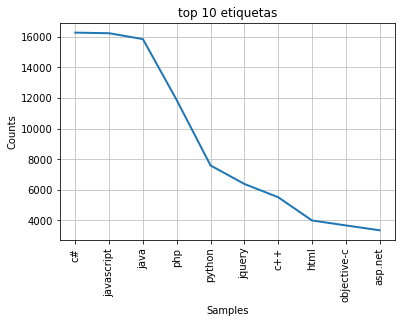

In [15]:
#Graficamos las 10 etiquetas más frecuentes
tags_counts.plot(10,title='top 10 etiquetas');

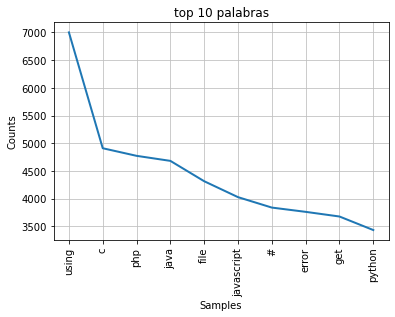

In [16]:
#Graficamos las 10 palabras más frecuentes
words_counts.plot(10,title='top 10 palabras');

### Transformando el texto a vectores

Vamos a construir los vectores asociados a cada frase en dos representaciones distintas, Bag of Words y tf-idf. Dejaremos la segunda para la parte 2 del Challenge.


#### Bag of words

Recuerda que para crear la representación de *bag of words*, convertimos cada frase en un vector que cuenta el número de ocurrencias de cada token. Se siguien los pasos:
1. Encuentra los **N** tokens mas comunes del corpus de entrenamiento y se les asigna un índice, este es nuestro **vocabulario**. Creamos un diccionario para convertir de tokens a índices y viceversa.
2. Para cada frase en el corpus, creamos un vector de dimensión **N** y lo inicializamos con ceros.
3. Iteramos sobre los tokens de cada frase, y si el token está en el diccionario, incrementamos en 1 el índice correspondiente del vector.
   
**Tarea 3 (BagOfWords):** 

Contruye la función que transforma un texto en su representación *bag of words*.

Implementa la codificación de *bag of words* en la función `my_bag_of_words()` con un tamaño de diccionario de **N=5000**. Para definir el diccionario, sólo podemos usar el conjunto de entrenamiento, sino tendríamos un *data leaking*.

Primero, contruimos el vocabulario y los diccionarios correspondientes, así como un `set` con las palabras del diccionario.

In [17]:
DICT_SIZE = 5000

## ESCRIBE AQUÍ TU CÓDIGO
most_common_words_dict_size = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE]
INDEX_TO_WORDS = dict (zip(range (0,DICT_SIZE), (tupla[0] for tupla in most_common_words_dict_size)))
WORDS_TO_INDEX = dict (zip((tupla[0] for tupla in most_common_words_dict_size),range (0,DICT_SIZE)))
##
ALL_WORDS = WORDS_TO_INDEX.keys()
assert len(ALL_WORDS)==DICT_SIZE

In [18]:
def my_bag_of_words(text: str, words_to_index: dict[str, int]) -> np.array:
    """
    text: str
    words_to_index: dict, diccionario con los índices del vocabulario

    return
    result_vector: numpy.array, vector con la representación bag-of-words de `text`
    """
    dict_size = len(words_to_index)
    result_vector = np.zeros(dict_size)

    ## ESCRIBE AQUÍ TU CÓDIGO
    tokens = text_tokenizer(text)
    for word in tokens:
        if word in words_to_index:
            result_vector[words_to_index[word]]+=1
    ##

    return result_vector

In [19]:
def test_my_bag_of_words():
    words_to_index = {"hi": 0, "you": 1, "me": 2, "are": 3}
    examples = ["hi how are you", "hi hi hi you house"]
    answers = [[1, 1, 0, 1], [3, 1, 0, 0]]
    for ex, expected in zip(examples, answers):
        output = my_bag_of_words(ex, words_to_index)
        if (output != np.asarray(expected)).any():
            return f"Respuesta incorrecta: BOW('{ex}') = {output} != {expected}"
    return "¡Tests correctos!"


print(test_my_bag_of_words())

¡Tests correctos!


Ahora aplicamos la función anterior a todos los datos.

La representación *bag of words* devuelve vectores __*sparse*__ (la mayoría de sus entradas son ceros), con lo que conviene usar estructuras de datos especiales para datos *sparse* para ser eficientes.

Hay muchos [tipos de representación sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html), y `sklearn` sólo trabaja con la representación [csr matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix), que es la que usamos.

In [20]:
from scipy import sparse as sp_sparse

In [21]:
X_train_mybag = sp_sparse.vstack(
    [sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX)) for text in X_train]
)
X_val_mybag = sp_sparse.vstack(
    [sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX)) for text in X_val]
)
X_test_mybag = sp_sparse.vstack(
    [sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX)) for text in X_test]
)
print("X_train shape ", X_train_mybag.shape)
print("X_val shape ", X_val_mybag.shape)
print("X_test shape ", X_test_mybag.shape)

X_train shape  (85000, 5000)
X_val shape  (15000, 5000)
X_test shape  (30000, 5000)


## Preguntas finales

* ¿Qué efecto tienen los caracteres de `REPLACE_BY_SPACE` y `GOOD_CHARS` sobre las features generadas? ¿Se te ocurre una mejor elección de los caracteres escogidos?
    
    * *Respuesta 1 - Genera features con textos más limpios. Elimanos caracteres que no aportan nada.*
    * *Respuesta 2 - Se nos ocurre como mejor elección haber ampliado a más simbolos el `REPLACE_BY_SPACE` como por ejemplo % ¡! ¿?*

* Como hemos comentado en el worksheet, la representación Bag of Words no tiene en cuenta el orden de los tokens. Pero hay extensiones de Bag of Words que en cierto grado tienen en cuenta el orden de las palabras. ¿Puedes dar una idea de cómo hacer esto? ¿Crees que puede ser relevante para el contexto del problema?

    * *Respuesta - Para recoger más contexto e intentar reflejarlo en el bag of words podemos realizarla teniendo en cuenta n-gramas en vez de unigramas. Recoger n-gramas de 2 o más palabras recoge más contexto y nos da más información. Por ejemplo unigramas como "blue", "sea", "deep" dan la significación aislada de su termino, pero si recogieramos n-gramas por ejemplo podriamos recoger "blue sea","deep sea", "deep blue". Este último termino dpendiendo el ámbito de los textos que analicemos puede tener multiples significados.https://es.wikipedia.org/wiki/Deep_Blue*.


***Como muestra, codifcamos un ejemplo de como crear un Bag of Words de n-gramas***

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import random
# Función que apoyandose en CountVectorizar de sklearn, se construira 
# el Bag of Words de n-gramas en este caso de 2.

def ngram_bag_of_words(text):
    # Con ngrams nos ayuda a capturar el contexto ya que no
    # contaremos palabras como unidad de información
    # sino como parejas de palabras.
    
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    X_train_counts = vectorizer.fit_transform(X_train)
    print('La dimensión de la matriz es : ', X_train_counts.shape,'\n')
    return vectorizer.get_feature_names()

In [23]:
#Visualizamos ejemplos los n-gramas o features que conforman la matriz.
pprint.pprint(random.sample(ngram_bag_of_words(X_train),30))

La dimensión de la matriz es :  (85000, 226162) 

['function exe',
 'thread window',
 'converting miles',
 'routing multiple',
 'nokogiri installing',
 'methodget pass',
 'started game',
 'container type',
 'pointer class',
 'cli script',
 'use git',
 'close row',
 'attach icommand',
 'php includes',
 'creating proxy',
 'html new',
 '16bit image',
 'characters missing',
 'backend yii',
 'use gui',
 'throwing javascript',
 'center uitableviewcell',
 'related panel',
 'selenuim web',
 'triple des',
 'implementation googles',
 'inside switch',
 'chrome jquery',
 'recommendation open',
 'table eclipse']


* ¿Cómo actuará un modelo entrenado con estas features ante erratas?
    * *Respuesta - Las erratas en principio no afectaran por que no estarían dentro de las 5000 palabras que se han tenido en cuenta bag of words y no serían detectadas, salvo que hubieran estado en la parte de entrenamiento y fueran muy numerosas, lo cual se conderarían como una palabra más.*